In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import cv2
import os
from skimage.feature import hog
from skimage import io, color
import skimage.io
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from skimage.color import rgb2gray

In [2]:
df = pd.read_csv('Data/chinese_mnist/chinese_mnist.csv')

In [3]:
df.head()

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   suite_id   15000 non-null  int64 
 1   sample_id  15000 non-null  int64 
 2   code       15000 non-null  int64 
 3   value      15000 non-null  int64 
 4   character  15000 non-null  object
dtypes: int64(4), object(1)
memory usage: 586.1+ KB


In [5]:
df.shape

(15000, 5)

In [6]:
df.groupby(["value","character"]).size()

value      character
0          零            1000
1          一            1000
2          二            1000
3          三            1000
4          四            1000
5          五            1000
6          六            1000
7          七            1000
8          八            1000
9          九            1000
10         十            1000
100        百            1000
1000       千            1000
10000      万            1000
100000000  亿            1000
dtype: int64

In [7]:
df.isnull().sum()

suite_id     0
sample_id    0
code         0
value        0
character    0
dtype: int64

In [8]:
image_files = list(os.listdir("Data/chinese_mnist/data/data"))
print("Number of image files: {}".format(len(image_files)))

Number of image files: 15000


In [9]:
def create_image_file_name(x):
    file_name = f"input_{x[0]}_{x[1]}_{x[2]}.jpg"
    return file_name

In [10]:
df["image_file"] = df.apply(create_image_file_name, axis=1)

In [11]:
def image_sizes(file_name):
    image = skimage.io.imread("Data/chinese_mnist/data/data/" + file_name)
    return list(image.shape)

In [12]:
image_size = np.stack(df['image_file'].apply(image_sizes))
image_size_df = pd.DataFrame(image_size,columns=['w','h'])
data = pd.concat([df,image_size_df],axis=1, sort=False)
data.head()

,suite_id,sample_id,code,value,character,image_file,w,h
0,1,1,10,9,九,input_1_1_10.jpg,64,64
1,1,10,10,9,九,input_1_10_10.jpg,64,64
2,1,2,10,9,九,input_1_2_10.jpg,64,64
3,1,3,10,9,九,input_1_3_10.jpg,64,64
4,1,4,10,9,九,input_1_4_10.jpg,64,64


In [13]:
file_names = list(data['image_file'])
print("There are {} matching image names".format(len(set(file_names).intersection(image_files))))

There are 15000 matching image names


In [14]:
num_duplicates = data.duplicated().sum() #identify duplicates
print('There are {} duplicate rows present in the dataset'.format(num_duplicates))

There are 0 duplicate rows present in the dataset


In [15]:
char_value=sorted(data['value'].unique())
print("Unique character values: {}".format(char_value))

Unique character values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 1000, 10000, 100000000]


In [16]:
def read_image(image_file_name):
    image = skimage.io.imread("Data/chinese_mnist/data/data/" + image_file_name)
    return image

In [17]:
X = np.stack(df['image_file'].apply(read_image))
y = df['value']

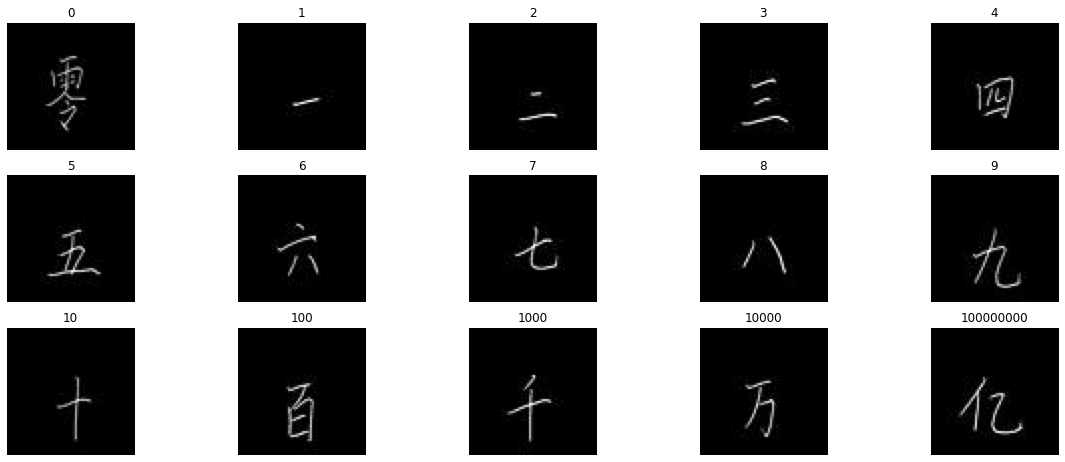

In [18]:
plt.figure(figsize=(20,6))

for i,j in enumerate([6000,7000,8000,9000,10000,11000,12000,13000,14000,0,1000,2000,3000,4000,5000]):
    plt.subplot(3,5,i+1)
    plt.subplots_adjust(top = 2, bottom = 1)
    img = X[j]
    plt.imshow(img.reshape(64,64),cmap = 'gray')
    plt.title(y[j])
    plt.axis('off')
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/8, random_state=0)

In [20]:
X_train.shape

(13125, 64, 64)

In [21]:
X_test.shape

(1875, 64, 64)

In [22]:
X_train = X_train.reshape(13125, 4096)

In [23]:
X_test = X_test.reshape(1875,4096)

In [24]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (13125, 4096)
X_test shape:  (1875, 4096)


In [25]:
X_train = X_train/255.0
X_test = X_test/255.0

In [26]:
from sklearn.svm import SVC
from datetime import datetime

In [27]:
# clf = SVC(kernel ='rbf')

In [28]:
clf = SVC(kernel="rbf")

In [29]:
start = datetime.now()
clf.fit(X_train, y_train)
end = datetime.now()
print('Time taken to train the model: ', end - start)

Time taken to train the model:  0:09:40.873462


In [30]:
print('Accuracy on the training set: ', clf.score(X_train, y_train))
print('Accuracy on the testing set: ', clf.score(X_test, y_test))                                    

Accuracy on the training set:  0.8944
Accuracy on the testing set:  0.744


## Use PCA to reduce the dimensionality of the data

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(0.9)

In [33]:
X_train_pca = pca.fit_transform(X_train)

In [34]:
print('X_train_pca shape: ', X_train_pca.shape)

X_train_pca shape:  (13125, 509)


In [35]:
X_test_pca = pca.transform(X_test)

In [36]:
print('X_test_pca shape: ', X_test_pca.shape)

X_test_pca shape:  (1875, 509)


In [37]:
clf = SVC(kernel='rbf')

In [38]:
start = datetime.now()
clf.fit(X_train_pca, y_train)
end = datetime.now()
print('Time taken to train the model: ', end - start)

Time taken to train the model:  0:01:25.382335


In [39]:
print('Accuracy on the training set: ', clf.score(X_train_pca, y_train))
print('Accuracy on the testing set: ', clf.score(X_test_pca, y_test))                                    

Accuracy on the training set:  0.9083428571428571
Accuracy on the testing set:  0.7712


##### Comment:
after using PCA, the accuracy is higher and time taken is also shorter